# TensorFlow 
## Linear Regression Model
### by [Sameer Kumar](https://sites.google.com/view/bvsk35/home?authuser=0)

## Part 1
Here I have implemented a simple linear regression model without using Eager API. 

In [1]:
# Import Libraries:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

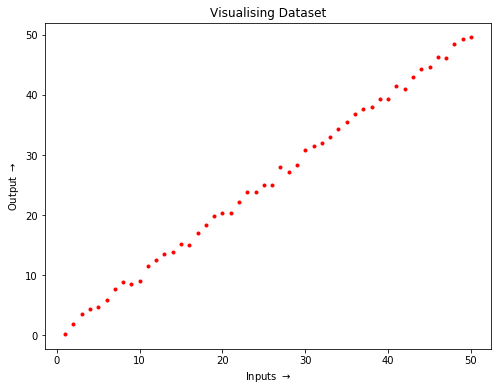

In [2]:
# Generate Dataset for training:
Train_X = np.arange(1, 51) # Inputs
Train_Y = np.arange(1, 51) + np.random.uniform(-1, 1, (50,)) # Output
N = Train_X.shape[0] # Total no.of samples

# Visulazing the dataset:
# This dataset is a simple set of scattered points around the X = Y line
plt.figure(figsize=(8, 6))
plt.plot(Train_X, Train_Y, 'r.')
plt.xlabel(r'Inputs $\rightarrow$')
plt.ylabel(r'Output $\rightarrow$')
plt.title('Visualising Dataset')
plt.show()

### Note:
 - If we are using `tf.train.GradientDescentOptimizer` (works on gradient descent routine) then we will need extremely low learning rate to stablize the learning during training. Hence it is bette to divide the learning rate parameter $\eta$ with total no. of training samples. 
 - If we are using `tf.train.AdamOptimizer` (works on Adam's optimization routine) then we can choose learning rate $\eta$ $\approx$ 0.01. This method provides more stable learning. It is always better to use Adam's optimzation method over gradient descent. 

In [3]:
# Parameters for training:
opt_choice = 'Adam' # Chose optimization routine, other option is 'GD'
eta = 0.01 # Learning rate
max_iter = 1000 # Total training epochs
verbose_freq = 200 # Frequency of printing stats of training
batch_size = 32 # Batch size
batch_training = False # Chose between batch and online learning

In [4]:
# Variables for the tensorflow computation graph:
# Placeholder variables i.e., variables which will be fed as input to the model
X = tf.placeholder(shape=[None, 1], name='input', dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], name='output', dtype=tf.float32)

# Variables that will be initialised with some value and will be modified 
# during training based on loss optimization
W = tf.get_variable(name='Weights', shape=[1, 1], initializer=tf.constant_initializer(np.random.randn())) # Weights
b = tf.get_variable(name='Bias', shape=[1], initializer=tf.constant_initializer(np.random.randn())) # Bias

Instructions for updating:
Colocations handled automatically by placer.


### Note:
- `tf.reduce_mean`: it takes sum of the all elements in the array and divides it with no. of elements in the array ([link](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean)). 
- `tf.reduce_sum`: it takes the sum of the all elements in the array ([link](https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum)). 

Use `tf.reduce_sum` and divide it with `2 * N`, where N corresponds to total no. of training samples. 

- Also very important thing since we have just 50 samples in traning set using batch learning is very bad don't use it. To make batch learning for this case we will need more modifcation of learning rate and total epochs. Just use the code for future refernce. 
- Hence for this problem default case should be Adam optimzer with default learning rate and online learning. With these arguments the code will work very well. 

In [5]:
# Construct the computation graph for training i.e.,
# create the model
# Predicted Output
pred = tf.add(tf.matmul(W, tf.transpose(X)), b)

# Loss: Mean Squared Error
loss = tf.reduce_sum(0.5 * tf.square(pred - Y))/N

# Optimizer
if opt_choice == 'Adam':
    opt = tf.train.AdamOptimizer(learning_rate=eta).minimize(loss)
elif opt_choice == 'GD':
    # To make learning stable divide eta with N
    eta = eta/N
    opt = tf.train.GradientDescentOptimizer(learning_rate=eta).minimize(loss)

In [6]:
# Run the model
# Create the session
sess = tf.Session()

# Initialize the variables
sess.run(tf.global_variables_initializer())

# Training the model: one training_step corresponds to one training iteration/epoch
if batch_training:
    # Batch Learning
    for training_step in range(max_iter+1):
        # Training using batches
        # Generate random training batch
        indices = np.random.randint(low=0, high=N, size=batch_size)
        Train_X_Batch = Train_X[indices].reshape(batch_size, 1)
        Train_Y_Batch = Train_Y[indices].reshape(batch_size, 1)

        # Run optimizer and get loss
        # We can first run optimizer (which gives no output) and 
        # then run/compute loss (which will give output) or we can do 
        # everything in one line like below
        _, loss_run = sess.run([opt, loss], feed_dict={X:Train_X_Batch, Y:Train_Y_Batch})

        # Print every so often
        if training_step % verbose_freq == 0:
            print('Epoch: {0:04d} Loss: {1:.3f}'.format(training_step, loss_run), 'W: ', sess.run(W), 'b: ', sess.run(b))
else:
    # Online Learning
    for training_step in range(max_iter+1):
        for (x, y) in zip(Train_X, Train_Y):
            _, loss_run = sess.run([opt, loss], feed_dict={X: x.reshape(1, 1), Y: y.reshape(1, 1)})

        # Print every so often
        if training_step % verbose_freq == 0:
            print('Epoch: {0:04d} Loss: {1:.3f}'.format(training_step, loss_run), 'W: ', sess.run(W), 'b: ', sess.run(b))

Epoch: 0000 Loss: 5.650 W:  [[0.5371486]] b:  [-0.32467383]
Epoch: 0200 Loss: 0.000 W:  [[0.99314034]] b:  [-0.01919467]
Epoch: 0400 Loss: 0.000 W:  [[0.993157]] b:  [-0.01988523]
Epoch: 0600 Loss: 0.000 W:  [[0.993157]] b:  [-0.01988523]
Epoch: 0800 Loss: 0.000 W:  [[0.993157]] b:  [-0.01988521]
Epoch: 1000 Loss: 0.000 W:  [[0.993157]] b:  [-0.01988522]


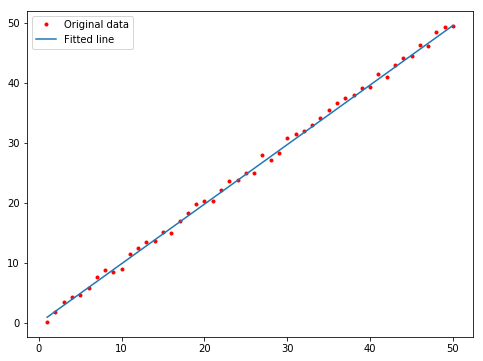

In [7]:
# Plot Final Result
plt.figure(figsize=(8, 6))
plt.plot(Train_X, Train_Y, 'r.', label='Original data')
plt.plot(Train_X.reshape(N, 1), Train_X.reshape(50, 1) * sess.run(W) + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

## Part 2
Here I have implemented a simple linear regression model using Eager API. 

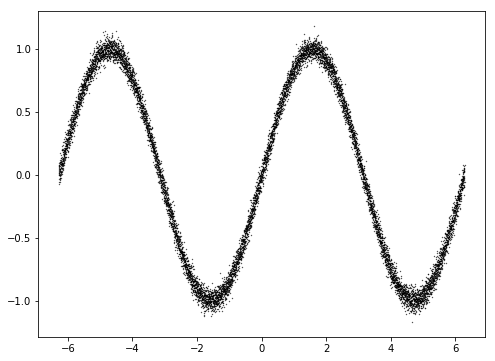

In [9]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])
plt.figure(figsize=(8, 6))
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.show()